## Week 6 Homework solutions
<hr style="height: 3.0px"/>

### Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

### Define Functions  
``` selectdata(image_file)``` and ```cal(pixpts, plotpts, datatoconvert)```

In [2]:
# pixel data stored in variable "pixel_positions"
def selectdata(image_file):
    %matplotlib notebook
    #now we have 1 row and 2 columns i.e. 2 figures in a row
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(9, 4))
    # gridspec_kw={'width_ratios': [2, 2]} can be used above if needed

    # turn off the x, y axis on the image - the axis doesn't make sense for an image
    ax1.axis(False)
    
    img = mpimg.imread(image_file) #matplotlib
    # .add_axes([left, bottom, width, height])
    image_axis = fig.add_axes([0, 0, 0.47, 0.9], zorder=10, anchor=(0.5,0.5)) #zorder places figure on top of anything else in axes
    image_axis.imshow(img)
    image_axis.axis('off')

    # recall from part 1 that image files have coord in left top corner so we need to correct by the y-dimension of the file
    ydim=img.shape[0]

    # setting title and labels for ax1 (figure on the left)
    ax1.set_title('Click on data you want to collect below')
    ax1.set_xlabel('x-pixel position')
    ax1.set_ylabel('y-pixel position')

    global pixel_positions #makes pixel_positions a global variable so we have access to it outside this function
    pixel_positions = []
    def onclick(event):
        if event.button==1:
            pixel_positions.append([event.xdata,ydim-event.ydata])
            ax2.set_title(f'Last click: [{event.xdata:.3f}, {ydim-event.ydata:.3f}]')
            ax2.scatter(event.xdata, ydim-event.ydata, marker='o', c='r', edgecolor='k') #adding scatter plot
    
    cid=fig.canvas.mpl_connect('button_press_event', onclick) 
    fig.show()
    
# enter list of three pixel points and list of three corresponding plot points 
def cal(pixpts, plotpts, datatoconvert):    
    
    xpx1, ypx1 = pixpts[0]
    x1, y1 = plotpts[0]
    xpx2, ypx2 = pixpts[1]
    x2, y2 = plotpts[1]
    xpx3, ypx3 = pixpts[2]
    x3, y3 = plotpts[2]
    
    # general solution for calibration constants
    m11=(x1*ypx2 - x1*ypx3 - x2*ypx1 + x2*ypx3 + x3*ypx1 - x3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m12=-(x1*xpx2 - x1*xpx3 - x2*xpx1 + x2*xpx3 + x3*xpx1 - x3*xpx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m21=(y1*ypx2 - y1*ypx3 - y2*ypx1 + y2*ypx3 + y3*ypx1 - y3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m22=-(-xpx1*y2 + xpx1*y3 + xpx2*y1 - xpx2*y3 - xpx3*y1 + xpx3*y2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    Ox=(-x1*xpx2*y3 + x1*xpx3*y2 + x2*xpx1*y3 - x2*xpx3*y1 - x3*xpx1*y2 + x3*xpx2*y1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)
    Oy=(x1*y2*ypx3 - x1*y3*ypx2 - x2*y1*ypx3 + x2*y3*ypx1 + x3*y1*ypx2 - x3*y2*ypx1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)
    
    # define our calibrated transf matrix, m_cal, and our calibrated offset, offset_cal
    m_cal=[[m11, m12],[m21,m22]]
    offset_cal=[Ox, Oy]
    
    # return as numpy arrays
    # return(np.array(m_cal), np.array(offset_cal))
    plot_data=np.array([np.matmul(m_cal, point-offset_cal) for point in np.array(datatoconvert)])

    return(plot_data)

## Homework problem 1:
<hr style="height:2px">

Let's see how well our method does on an image that is skewed and rotated.  Let's say your just really bad at making a photocopy.  

Reproduce the plot below.  Label your axes. 

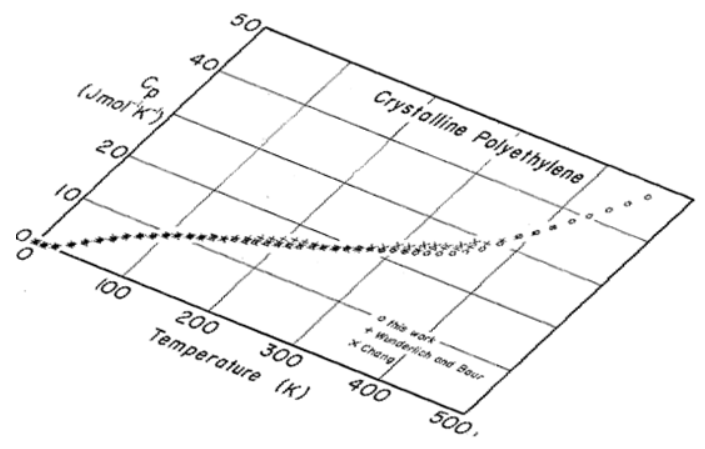

Complete as in previous homework. The calibration routine will remove the rotation and skew in the above image automatically.  

<IPython.core.display.Javascript object>


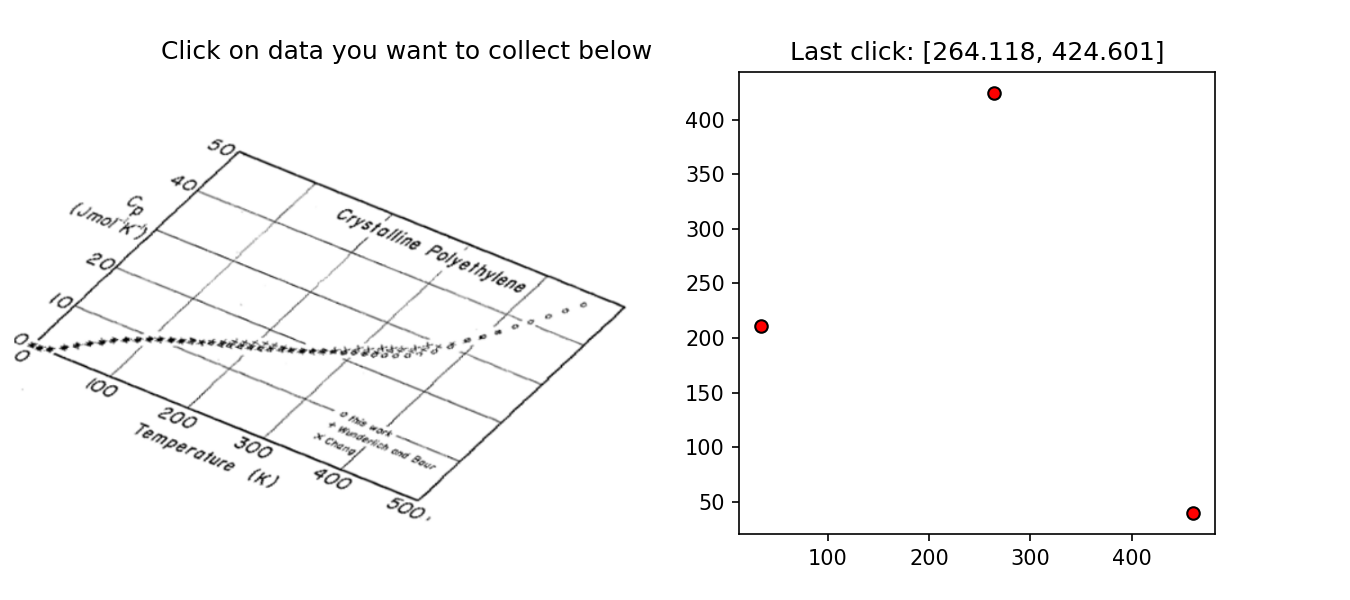

In [3]:
path=r"C:\Users\Sean\OneDrive - Virginia Tech\Documents\Teaching\2114 & 3114 Math I & II\git_2114_3114\images"
filename='hw image 1.png'
fullpath=os.path.join(path, filename)

selectdata(fullpath)

In [5]:
pxpts=pixel_positions
pxpts
pltpts=[[500,0],[0,0],[0,50]]

<IPython.core.display.Javascript object>


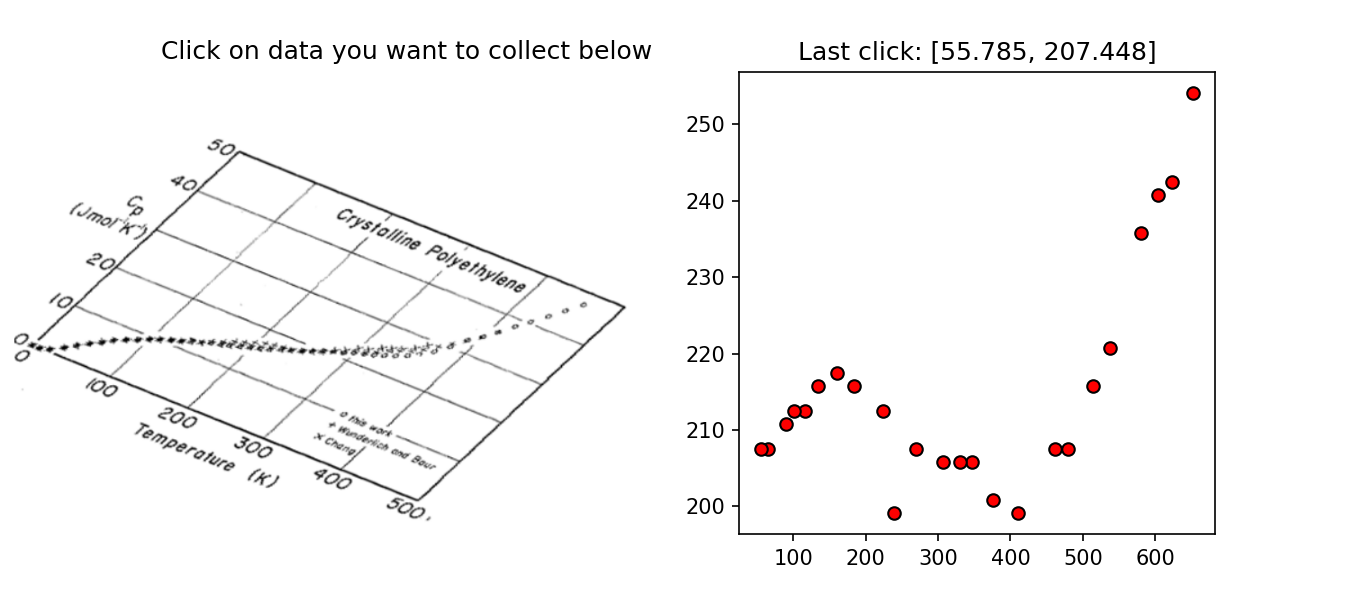

In [9]:
selectdata(fullpath)

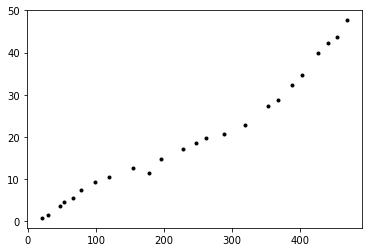

In [12]:
%matplotlib inline
plotdata=cal(pxpts, pltpts,pixel_positions)
plt.plot(plotdata[:,0], plotdata[:,1], 'k.')
plt.show()

## Homework Problem 2:
<hr style="height:2px">

How can we handle log-linear plots?  Our transformation is only a linear transformation.  Hint:  Don't use a log axis on the y-axis but transform your data first. So for example, calibration point (1.70, $10^{-13}$) should be taken as (1.70, -13).  

Reproduce the plot below.  Use separate data sets for the two different types of points. Label your axes.   
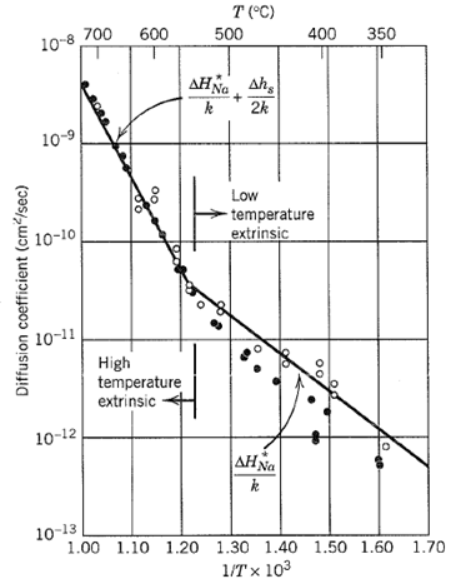

Fig caption: Diffusion coefficients measured directly (open circles) and calculated from the electical conductivity data (closed circles) for $(Na)^+$ in sodium chloride. At the break in the curves between the two regimes, the concentration of intrinsic vacancies equals that due to the extrinsic dopant. From "Physical Ceramics", Chiang, Birnie, and Kingery, John Wiley & Sons (1997), pg 202.

<IPython.core.display.Javascript object>


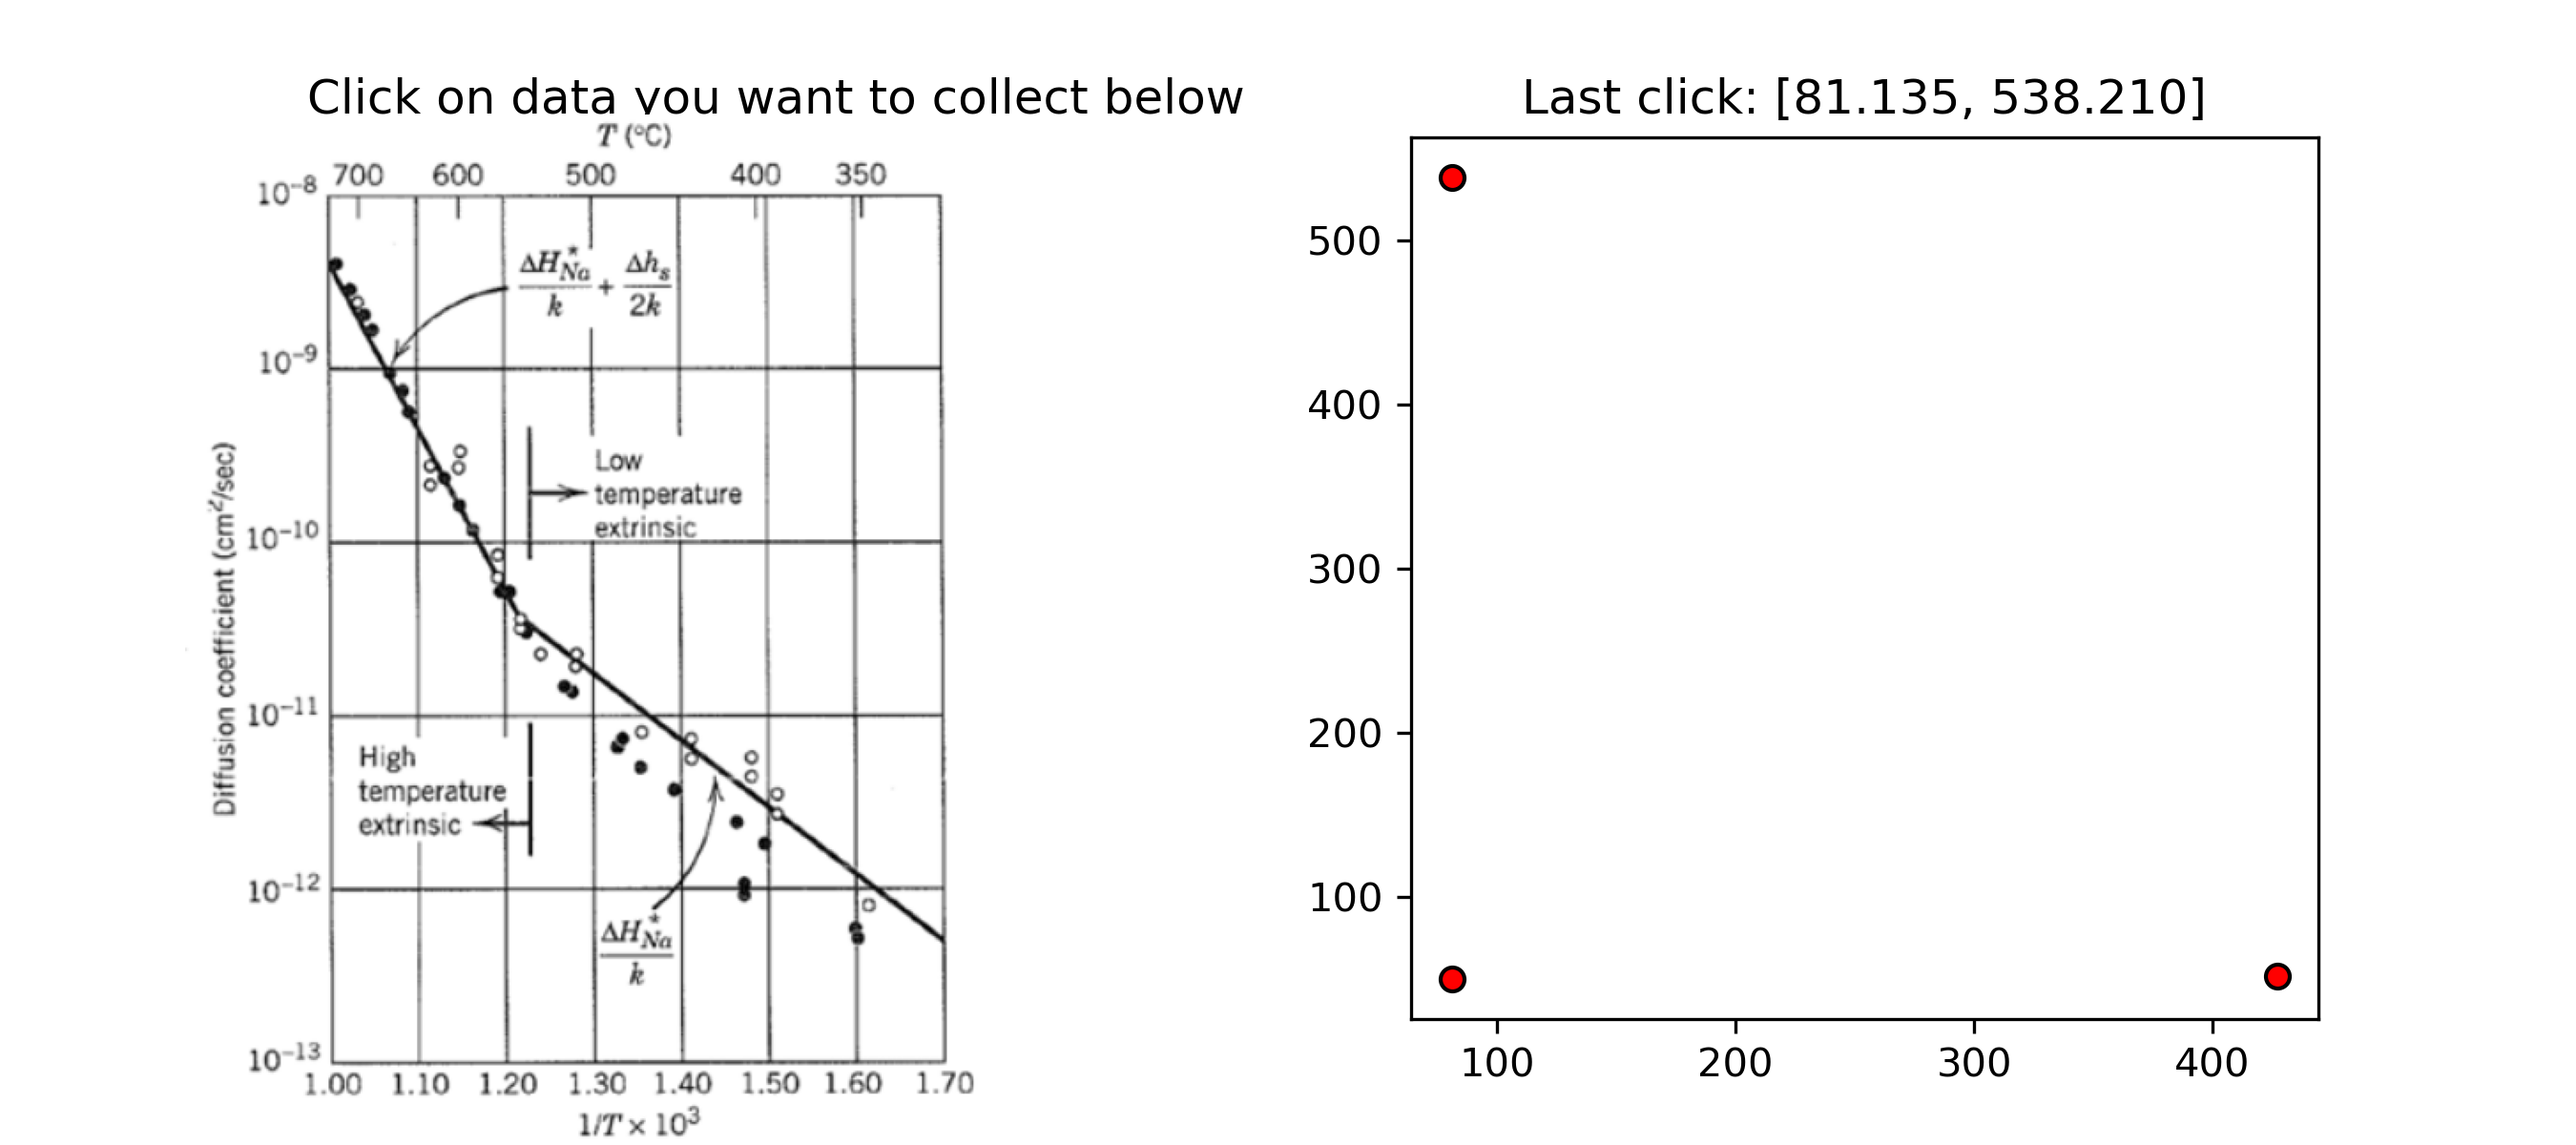

In [4]:
path=r"C:\Users\Sean\OneDrive - Virginia Tech\Documents\Teaching\2114 & 3114 Math I & II\git_2114_3114\images"
filename='hw image 2.png'
fullpath=os.path.join(path, filename)

selectdata(fullpath)

In [5]:
# we have a linear calibration so we want to take the log of the y axis when defining our calib
# notice the y values of pixpts are the log values e.g. now we use -13 and not 10^-13
pixpts=pixel_positions #correspond to plot points: [[1.70, -13], [1,-13],[1,-8]]
display(pixpts)
plotpts=[[1.70, -13], [1,-13],[1,-8]]
display(plotpts)

[[427.1014592488607, 51.59341100056963],
 [81.134792582194, 49.97674433390296],
 [81.134792582194, 538.2100776672363]]

[[1.7, -13], [1, -13], [1, -8]]

<IPython.core.display.Javascript object>


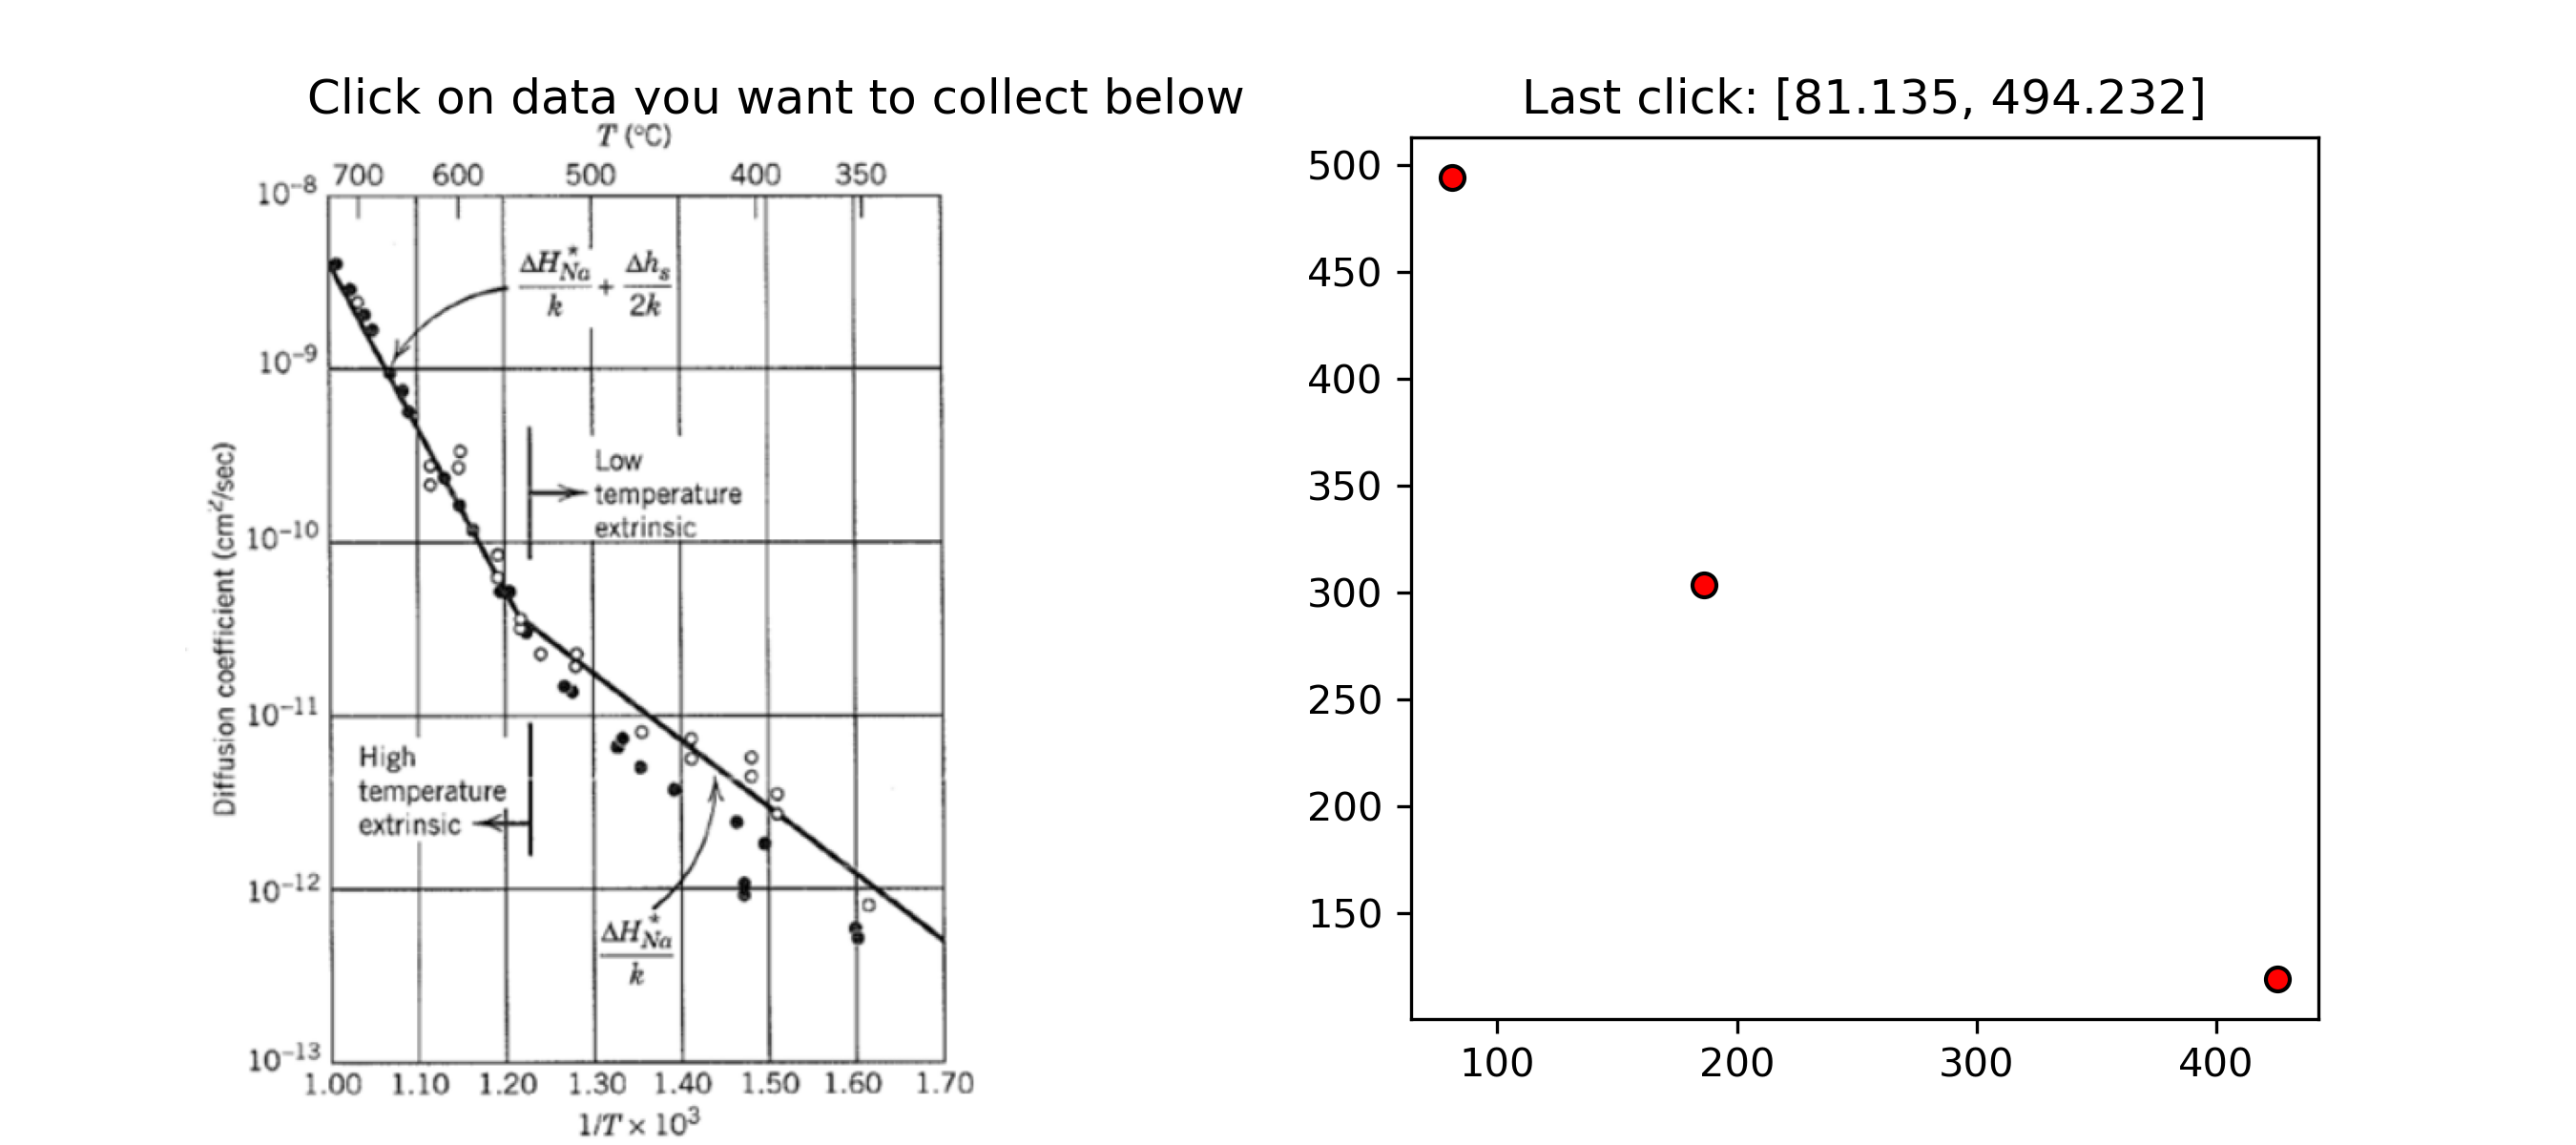

In [6]:
selectdata(fullpath)

In [7]:
datatoconvert=pixel_positions
plotdata=cal(pixpts,plotpts,datatoconvert)
plotdata

array([[  1.69672897, -12.30792139],
       [  1.21261682, -10.40905403],
       [  1.        ,  -8.45038286]])

<IPython.core.display.Javascript object>


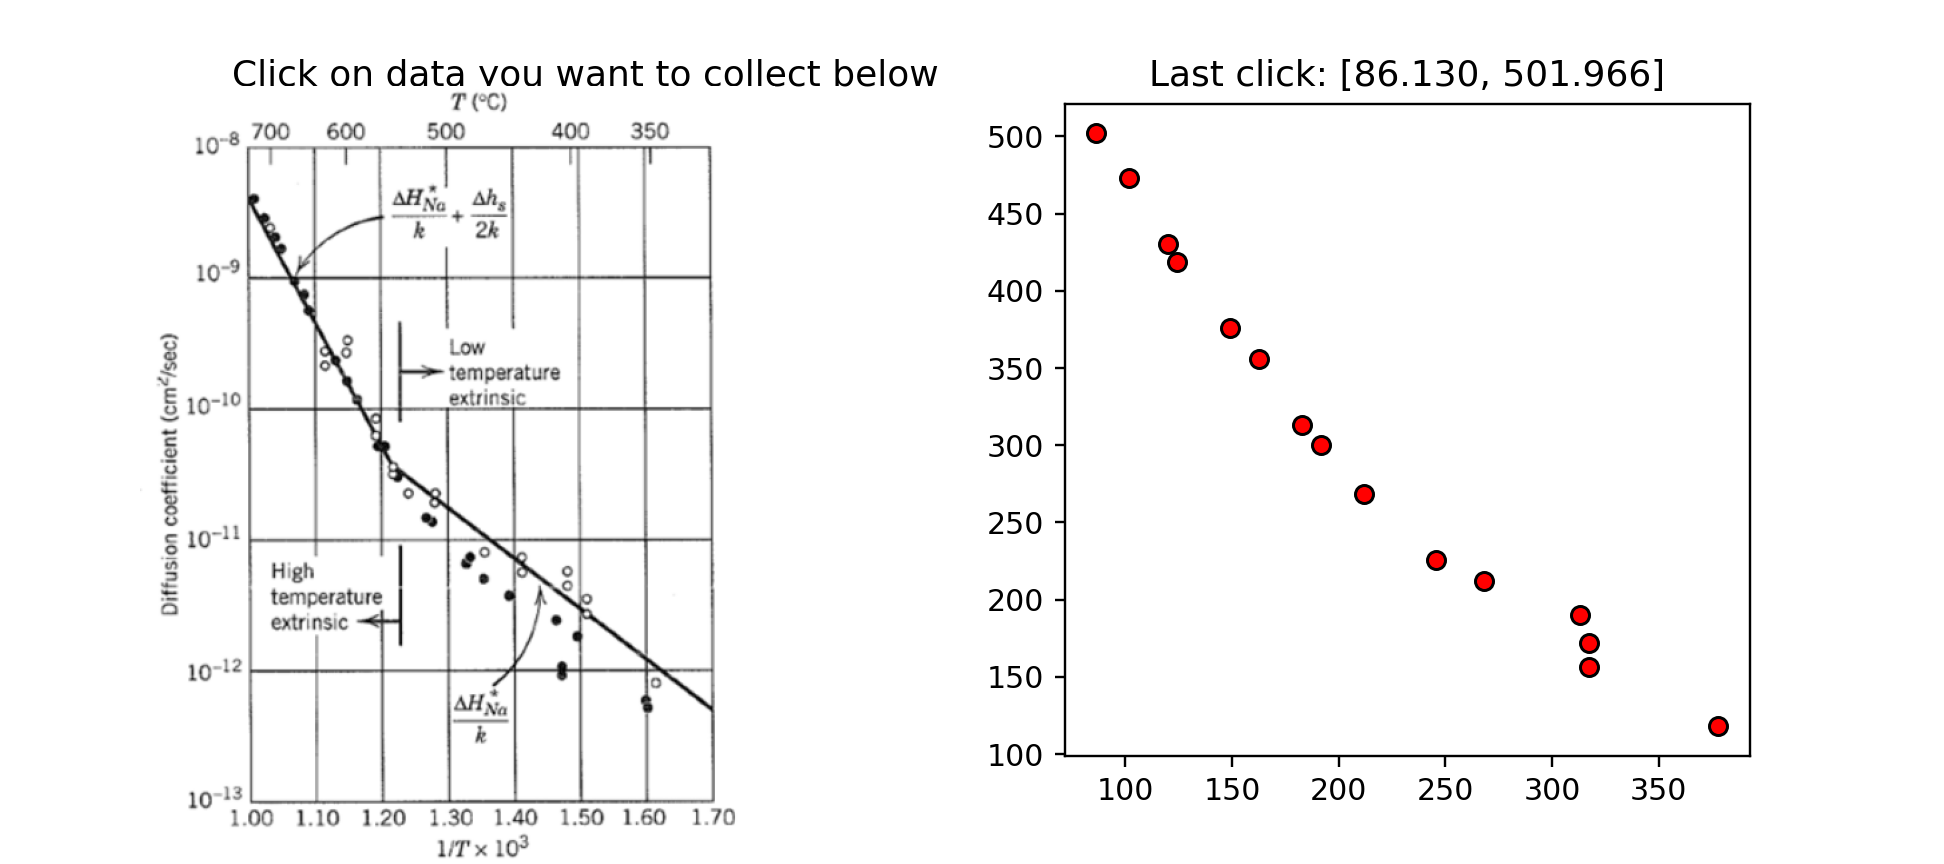

In [11]:
selectdata(fullpath)

In [14]:
filled=pixel_positions

plotdata2=cal(pixpts,plotpts,filled)
plotdata2

array([[  1.60070971, -12.31750214],
       [  1.47804616, -11.92368848],
       [  1.47804616, -11.76272454],
       [  1.46895997, -11.57855084],
       [  1.37809808, -11.3464533 ],
       [  1.33266714, -11.20740968],
       [  1.26452072, -10.76889576],
       [  1.22363287, -10.44600079],
       [  1.20546049, -10.30760189],
       [  1.16457264,  -9.86973268],
       [  1.13731407,  -9.66213432],
       [  1.08734003,  -9.22405021],
       [  1.07825384,  -9.10886106],
       [  1.04190909,  -8.67109931],
       [  1.01010743,  -8.3714141 ]])

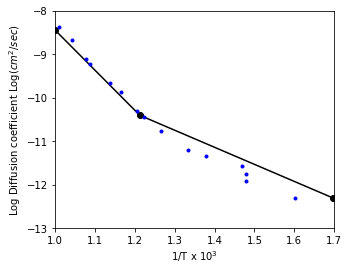

In [15]:
%matplotlib inline
fig,ax=plt.subplots(figsize=[5,4])
ax.plot(plotdata[:,0], plotdata[:,1], 'ko-')
ax.plot(plotdata2[:,0], plotdata2[:,1], 'b.')
ax.set_xlabel('1/T x $10^3$')
ax.set_ylabel('Log Diffusion coefficient Log($cm^2 / sec$)') # we are plotting the log of the data
ax.set_xlim(1.0, 1.7)
ax.set_ylim(-13,-8) #notice our y axis is now linear -- the log of the data has already been taken
plt.show()

## Homework Problem 3

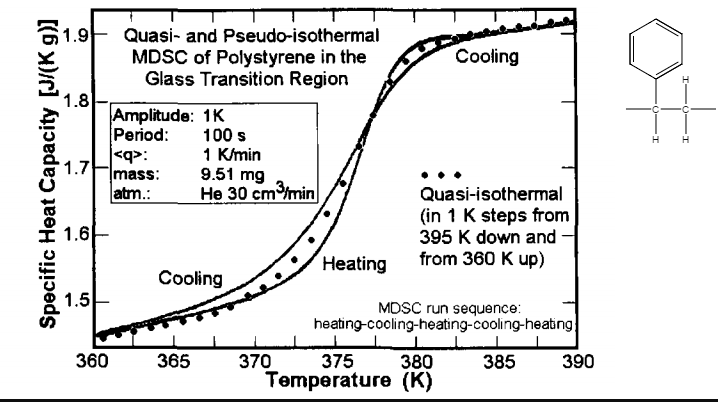

MDSC plot of polystyrene measuring the glass transition as changes in heat capacity as a function of temperature using either a heating or cooling rate as indicated by the solid lines. The dotted line indicates a quasi-isothermal measurement of the glass transition of polystyrene. Adapted from L. C. Thomas, A. Boller, I. Okazaki, and B. Wunderlich, Thermochim. Acta, 1997, 291, 85.

The kinetics of the glass transition of Polystyrene is measured by quasi-isothermal, temperature-modulated differential scanning calorimetry (TMDSC) and compared to pseudo-isothermal analyses of standard TMDSC traces.

<IPython.core.display.Javascript object>


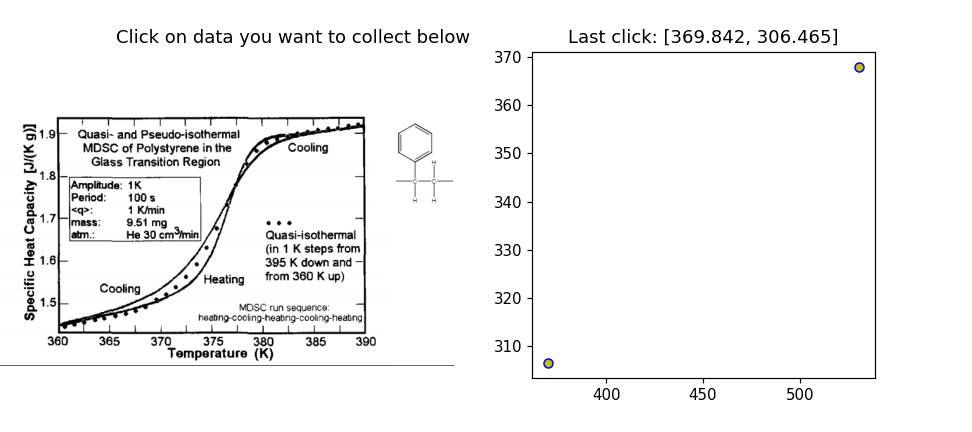

In [43]:
path=r"C:\Users\Sean\OneDrive - Virginia Tech\Documents\Teaching\2114 & 3114 Math I & II\git_2114_3114\images"
filename='heat capacity vs T glass trans.png'
fullpath=os.path.join(path, filename)

selectdata(fullpath)

In [17]:
pixel_positions

[[574.0912454663721, 55.04942375886526],
 [90.01559534816877, 55.04942375886526],
 [90.01559534816877, 370.38039302600475],
 [560.4553116602256, 378.90285165484636],
 [536.5924274994691, 375.4938682033097],
 [509.3205598871759, 372.0848847517731],
 [476.9352170975778, 365.2669178486998],
 [439.4363991306747, 358.4489509456265],
 [405.3465646153083, 348.2220005910166],
 [386.59715563185677, 317.5411495271868],
 [361.0297797453319, 269.81538120567376],
 [340.57587903611204, 211.86266252955085],
 [315.0085031495872, 165.84138593380612],
 [277.50968518268417, 133.45604314420802],
 [209.3300161519513, 95.95722517730496],
 [158.19526437890164, 73.79883274231679],
 [129.21890504084018, 72.09434101654847],
 [98.53805397701039, 63.571882387706864]]

<IPython.core.display.Javascript object>


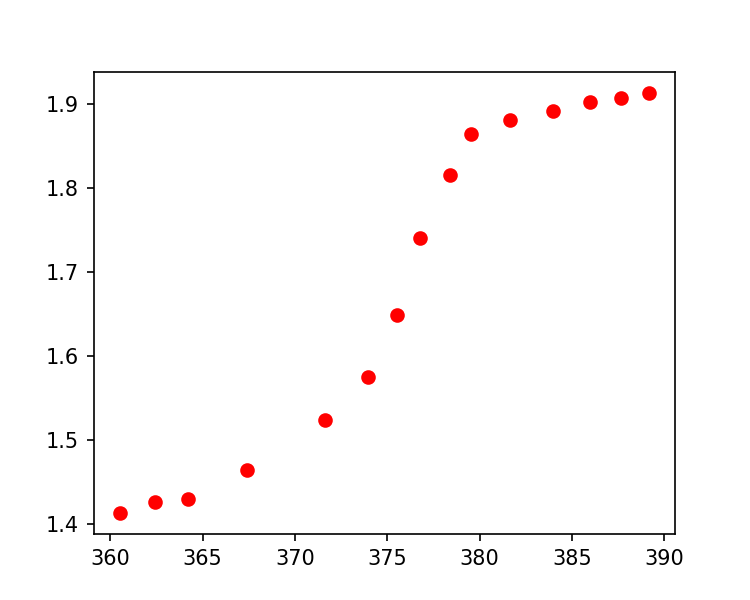

In [20]:
cal_pts=pixel_positions[0:3]
data=pixel_positions[3:]
plot_data=cal(cal_pts[0], [390,1.4],cal_pts[1],[360,1.4],cal_pts[2],[360,1.9], data)
    
plt.subplots(figsize=[5,4])
plt.plot(plot_data[:,0], plot_data[:,1], 'ro');

In [32]:
def mov_avg(x):
    l=len(x)-1
    return([(x[i+1]+x[i])/2 for i in np.arange(l)])

def deriv(x,y):
    l=len(x)-1
    return([(y[i+1]-y[i])/(x[i+1]-x[i]) for i in np.arange(l)])

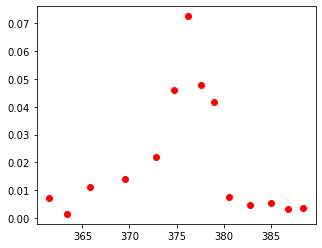

In [33]:
%matplotlib inline

slope=deriv(plot_data[:,0],plot_data[:,1])
xval=mov_avg(plot_data[:,0])

plt.subplots(figsize=[5,4])
plt.plot(xval, slope, 'ro');

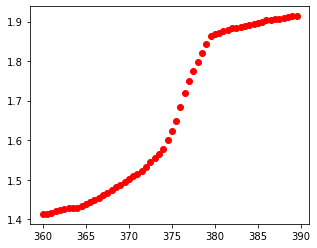

In [29]:
x_pts=np.arange(360,390,0.5)
interp_data_y=[np.interp(x_pts[i], np.flip(plot_data[:,0]), np.flip(plot_data[:,1])) for i in np.arange(len(x_pts))]
plt.subplots(figsize=[5,4])
plt.plot(x_pts, interp_data_y, 'ro');

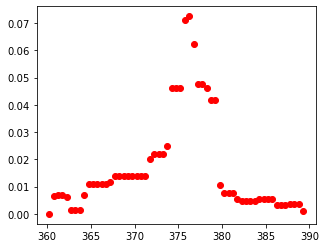

In [34]:
pdx=x_pts
pdy=interp_data_y
slope=deriv(pdx,pdy) 
xval=mov_avg(pdx)

plt.subplots(figsize=[5,4])
plt.plot(xval, slope, 'ro');